

---



---



# Task 2:

In [1]:
#2.

#!pip install PyPortfolioOpt
!pip install yfinance
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import acf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#2.
#import stock prices and calculate discrete returns
df_close = pd.read_csv('https://raw.githubusercontent.com/RalfKellner/data_transfer/main/sp500_alltimers.csv', index_col = 'date')
disc_returns_df = df_close.pct_change()
del_stocks = list(disc_returns_df.columns[disc_returns_df.isnull().sum() > 1])
disc_returns_df.drop(del_stocks, axis = 1, inplace = True)
disc_returns_df.dropna(inplace = True)
disc_returns_df.set_index(pd.to_datetime(disc_returns_df.index), drop = True, inplace = True)
disc_returns_df

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
date,,,,,,,,,,,,,,,,,,,,,
1998-01-05,-0.023076,0.005561,0.013886,0.002882,0.013542,0.019993,-0.007299,-0.003658,-0.006811,-0.013717,...,0.002020,-0.009820,0.015064,-0.009677,0.017430,0.009525,0.014175,-0.008639,-0.011111,-0.030042
1998-01-06,0.192914,-0.016590,0.033491,-0.022988,0.002055,0.029413,-0.014706,-0.002448,-0.004000,-0.010431,...,-0.006048,-0.009918,0.009132,0.011401,-0.021414,0.006289,-0.002541,-0.014161,-0.035751,-0.042036
1998-01-07,-0.075908,0.006560,-0.014723,0.061765,-0.013333,-0.033445,-0.008955,-0.003681,-0.009754,0.000703,...,-0.002029,-0.016694,-0.026019,-0.006442,-0.021882,-0.003125,-0.033121,-0.009945,0.031780,-0.002309
1998-01-08,0.039284,0.013036,0.008973,-0.005540,-0.004159,0.023028,-0.012048,0.002463,-0.005214,-0.009832,...,-0.022357,0.016978,0.005807,-0.027552,-0.022372,-0.014107,-0.031621,0.002232,-0.021561,-0.039353
1998-01-09,0.000000,-0.011029,-0.022224,-0.025070,-0.019833,-0.075567,0.009147,-0.006142,-0.038439,-0.041135,...,0.002078,-0.046744,-0.035797,-0.016667,-0.013730,-0.028617,-0.017687,-0.010023,-0.024134,0.002410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.005926,0.010966,0.014809,-0.009112,0.002329,-0.056630,0.010432,0.015153,0.001314,0.003586,...,-0.001912,0.003179,0.004401,0.004717,0.003560,-0.001964,-0.004952,0.002899,0.004891,0.012543
2022-11-25,-0.019594,0.008866,-0.004408,0.006406,0.005217,0.018217,0.007602,0.003574,0.001969,0.007964,...,-0.002395,0.002324,0.002831,0.002744,0.002069,0.004265,0.004977,0.006214,-0.003521,0.004765
2022-11-28,-0.026264,-0.014678,-0.015944,-0.011807,-0.021292,-0.026463,-0.009796,-0.002619,-0.005566,-0.019938,...,-0.020403,-0.009696,-0.033273,0.000790,-0.012389,0.002875,-0.034045,-0.003447,-0.030033,-0.000632


In [3]:
#2.
#create df with timeline (2020-2021)
disc_returns_df_timeline = disc_returns_df.loc["2020-01-01":"2021-12-31"]
disc_returns_df_timeline

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.022816,0.001036,0.014008,-0.005178,-0.001056,0.023820,-0.009766,-0.011110,0.008377,0.003290,...,0.002035,-0.000929,0.006236,0.002282,-0.009696,0.000842,-0.026821,-0.017483,0.016051,0.014296
2020-01-03,-0.009722,-0.012191,-0.007834,-0.001952,-0.002114,-0.015333,0.000395,-0.001070,-0.007728,0.000089,...,0.000000,-0.006139,-0.017042,0.009718,0.004257,-0.008828,0.001701,0.004809,-0.008040,-0.003132
2020-01-06,0.007968,0.005240,0.005726,-0.007823,0.001353,0.011733,0.000920,0.003320,0.000779,0.002925,...,0.008632,-0.005990,0.009389,0.005203,0.013141,-0.002036,-0.002038,-0.001436,0.007678,-0.000589
2020-01-07,-0.004703,-0.005560,-0.000959,-0.012046,-0.012104,0.002031,0.003677,0.000214,-0.005642,-0.008572,...,-0.005034,-0.008286,0.000339,0.000690,0.000000,-0.009265,-0.006467,-0.002077,-0.008184,0.001768
2020-01-08,0.016086,0.004077,0.013438,-0.011084,0.009397,0.013067,-0.001701,-0.002989,0.011739,0.002763,...,-0.058357,0.003039,0.013981,0.000603,-0.015481,-0.003432,0.003768,-0.000961,-0.015081,0.001765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,0.016528,0.014150,0.009627,0.017727,0.011780,0.006091,0.006473,0.005834,0.017086,...,0.004952,0.008478,0.014740,0.011424,0.015861,0.009105,0.026398,0.003153,0.014258,0.019728
2021-12-28,-0.005767,-0.006998,-0.014402,0.013017,-0.000893,-0.005382,0.009937,0.012976,-0.004042,0.008701,...,0.013799,-0.007177,0.000477,0.008242,-0.003808,0.014351,0.005043,0.011973,-0.003232,-0.000217
2021-12-29,0.000502,0.005126,-0.000123,0.001195,0.007884,-0.000707,0.005542,0.004195,0.001941,0.007345,...,0.015944,0.000620,0.010185,0.007509,-0.004587,-0.000490,0.020572,0.005028,-0.008753,0.004928


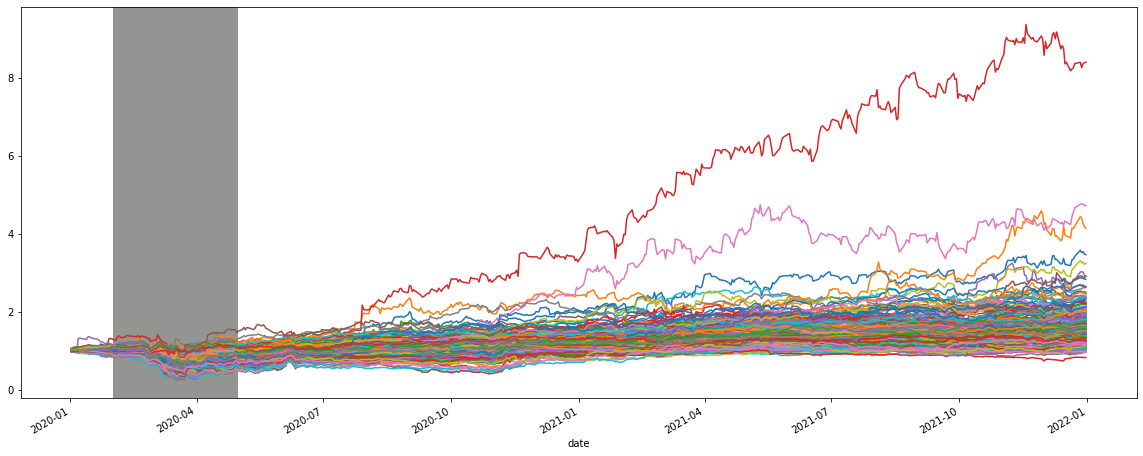

In [4]:
#2.
#Visualization of log returns throughout the timeline, highlighting the corona crisis period.
import matplotlib.pylab as plt
corona_start = "2020-02-01"
corona_end = "2020-04-30"

log_returns_d_timeline = disc_returns_df_timeline.apply(np.log).diff().iloc[1:, :]
col_with_missing_values = list(log_returns_d_timeline.columns[log_returns_d_timeline.isnull().sum() > 0])
log_returns_d_timeline.drop(col_with_missing_values, axis = 1, inplace = True)
(1 * disc_returns_df_timeline.cumsum().apply(np.exp)).plot(figsize = (20,8),legend=False)
plt.axvspan(corona_start, corona_end,color=sns.xkcd_rgb['grey'])


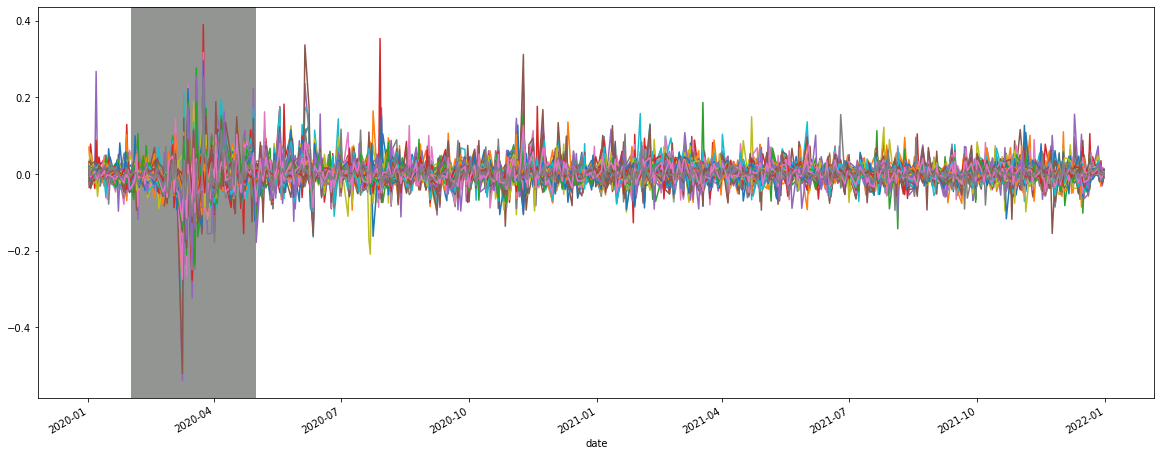

In [5]:
#2.
#Visualization of the discrete returns throughout the timeline, highlighting the corona crisis period.
disc_returns_df_timeline.plot(figsize=(20,8),legend=False)
plt.axvspan(corona_start, corona_end,color=sns.xkcd_rgb['grey'])



---



---



# Task 3:

Calculate **risk contributions**:
Identifying low and high risk contribution stocks gives us the ability to distinguish and select portfolios based on high risk and high return or low risk and low return. High risk individuals therefore contribute to high vola and low risk individuals contribute to low vola. In a sense, risk contribution or risk budgeting can be regarded as loss contribution or loss budgeting. Both theoretical proof and empirical evidence show that risk contribution has a
sound economic interpretation – expected contribution to potential losses of a portfolio.

One possible way to identify individual risk contribution is given by the covariance matrix. The i-th row of the covariance matrix contains the variance of the i-th stock and all its pairwise covariances. Simply summing over each row gives us a number which is higher, the higher the stock's variance as well as pairwise covariances.

This calculation can be used to determine which stocks or portfolios are contributing the most to the overall risk of the portfolio, and can be used to make decisions about which stocks to buy or sell in order to manage the risk of the portfolio.

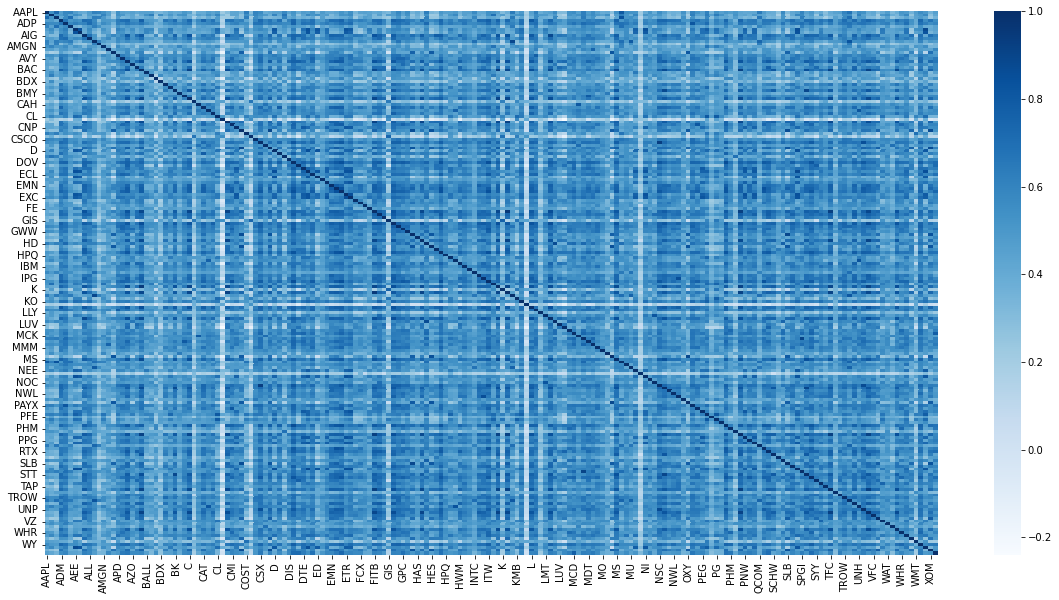

In [6]:
#3.
#In the two showcases below I have just created the correlation heatmap over the given timeline and the Corona Crisis time - Just as a small illustration of how the shares correlated in the given timeline:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data = disc_returns_df_timeline.corr(), cmap="Blues", ax = ax)

In the figure above (a heat map with estimated correlation during the given timeline), we cannot really see specific correlations between some companies. Nevertheless, we can see some companies (the lighter colored correlations) that correlate quite little with other companies.

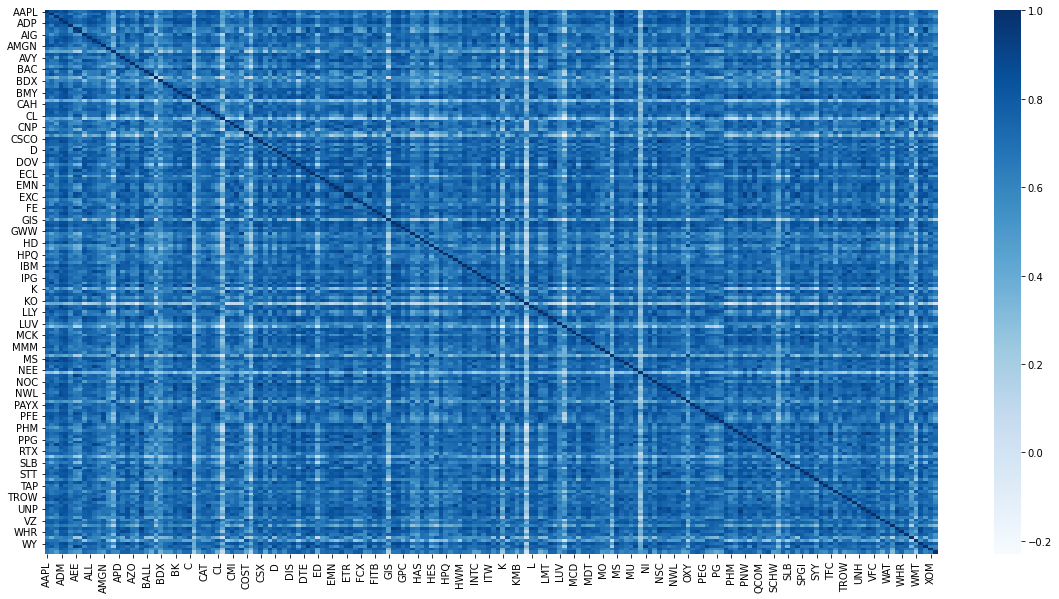

In [7]:
#3.
disc_returns_df_timeline_corona = disc_returns_df_timeline.loc["2020-02-01":"2020-04-30"]
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data = disc_returns_df_timeline_corona.corr(), cmap="Blues", ax = ax)

In the figure above (a heatmap with the estimated correlation during the Corona crisis period), we cannot really see specific correlations between some companies. Nevertheless, we can see that the heatmap is little darker than the previous heatmap, which means that there are higher estimated correlations during the Corona crisis.



---



In [8]:
#3.
#here I calculate the covariance matrix for the given timeline:
disc_returns_df_timeline.cov()

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
AAPL,0.000557,0.000252,0.000428,0.000222,0.000298,0.000384,0.000232,0.000182,0.000318,0.000243,...,0.000190,0.000286,0.000368,0.000197,0.000255,0.000177,0.000436,0.000227,0.000229,0.000230
ABT,0.000252,0.000394,0.000258,0.000193,0.000243,0.000243,0.000228,0.000186,0.000215,0.000198,...,0.000190,0.000210,0.000294,0.000195,0.000157,0.000143,0.000327,0.000222,0.000151,0.000178
ADBE,0.000428,0.000258,0.000626,0.000202,0.000307,0.000477,0.000205,0.000154,0.000267,0.000223,...,0.000145,0.000245,0.000271,0.000183,0.000254,0.000175,0.000403,0.000206,0.000164,0.000187
ADM,0.000222,0.000193,0.000202,0.000403,0.000289,0.000278,0.000231,0.000198,0.000491,0.000295,...,0.000270,0.000449,0.000383,0.000228,0.000324,0.000130,0.000486,0.000217,0.000364,0.000236
ADP,0.000298,0.000243,0.000307,0.000289,0.000466,0.000338,0.000280,0.000234,0.000448,0.000326,...,0.000254,0.000418,0.000383,0.000256,0.000343,0.000138,0.000490,0.000261,0.000321,0.000271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WMT,0.000177,0.000143,0.000175,0.000130,0.000138,0.000141,0.000179,0.000132,0.000098,0.000118,...,0.000166,0.000153,0.000164,0.000119,0.000067,0.000252,0.000193,0.000158,0.000094,0.000069
WY,0.000436,0.000327,0.000403,0.000486,0.000490,0.000480,0.000383,0.000299,0.000785,0.000463,...,0.000380,0.000712,0.000733,0.000360,0.000580,0.000193,0.001100,0.000366,0.000576,0.000460
XEL,0.000227,0.000222,0.000206,0.000217,0.000261,0.000203,0.000354,0.000301,0.000272,0.000235,...,0.000183,0.000271,0.000311,0.000217,0.000160,0.000158,0.000366,0.000374,0.000178,0.000201
XOM,0.000229,0.000151,0.000164,0.000364,0.000321,0.000281,0.000226,0.000173,0.000641,0.000338,...,0.000291,0.000592,0.000396,0.000232,0.000548,0.000094,0.000576,0.000178,0.000728,0.000294






With the covariance matrix in hand, we can now calculate the risk contribution of each company.


In [9]:
#3.
# Calculate the risk contribution of each company
risk_contribution = disc_returns_df_timeline.cov().sum(axis = 1).sort_values(ascending = False)
risk_contribution

LNC    0.137374
APA    0.123939
OXY    0.120049
HAL    0.118154
KEY    0.105695
         ...   
CAG    0.022237
GIS    0.021311
CPB    0.017248
KR     0.011200
CLX    0.008421
Length: 188, dtype: float64

In [10]:
#3.
risk_contribution.describe()

count    188.000000
mean       0.062244
std        0.022087
min        0.008421
25%        0.048100
50%        0.059063
75%        0.074806
max        0.137374
dtype: float64



---



---



# Task 4:

Now, we are going to calculate the exposure to the Fama-French-Factors for the top 10 and lowest 10 risk contributors - which we calculated in Task 3 - and compare the exposures (and the extracted companies in general) whithin the whole timeline.

       high_contributers  low_contributers
count         505.000000        505.000000
mean            0.000378          0.000555
std             0.039460          0.012380
min            -0.361672         -0.067164
25%            -0.017475         -0.005321
50%            -0.000932          0.000771
75%             0.019357          0.006222
max             0.172614          0.095359


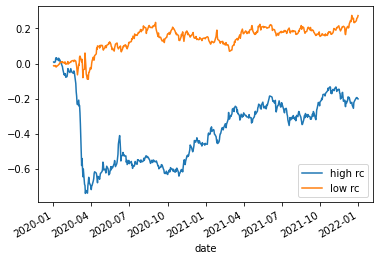

In [11]:
#4.
#define function for a better visualization later of the log returns
def cumprod_returns(returns):
    return (returns + 1).cumprod() - 1

# number of assets in a portfolio with low and high risk contributers
n_assets = 10

# list of companies with high risk contribution
high_risk = list(risk_contribution.index[:n_assets])
# list of companies with low risk contribution
low_risk = list(risk_contribution.index[-n_assets:])

# daily pf return for high and low risk portfolios
high_risk_pf = disc_returns_df_timeline.loc[:, high_risk].mean(axis = 1)
low_risk_pf = disc_returns_df_timeline.loc[:, low_risk].mean(axis = 1)
# daily log pf returns for high and low risk portolios
high_risk_pf_logr = np.log(1 + high_risk_pf)
low_risk_pf_logr = np.log(1 + low_risk_pf)
# this is what you earn over time for investing one monetary unit at the start
cumprod_returns(high_risk_pf_logr).plot(label = 'high rc')
cumprod_returns(low_risk_pf_logr).plot(label = 'low rc')
plt.legend()


# see a summary of both portfolios and their performance
summary_logr = pd.concat((high_risk_pf_logr.describe(), low_risk_pf_logr.describe()), axis = 1)
summary_logr.columns = ['high_contributers', 'low_contributers']
print(summary_logr)




The chart above shows the logarithmic returns of the high risk portfolio and the low risk portfolio. We can see that the high risk portfolio crashed very quickly, while the low risk portfolio crashed almost not at all. That's pretty impressive in my opinion. The portfolio with the stocks with the 10 highest risk contributions performed much worse than the stocks with the 10 lowest risk contributions. Higher risk goes along with higher expected return. But in our timeline the high risk portfolio with its higher pairwise covariances goes along with higher losses. 

In the next step, we will look at the FF3 of these portfolios to find a possible reason for this different behavior.



---



---

**Three factor regressions**

In [12]:
#4.
import statsmodels.api as sm

# import daily fama french factors
three_factors = pd.read_csv('https://raw.githubusercontent.com/RalfKellner/dlta_repo/master/ff_factors_daily.csv')
three_factors.loc[:, 'date'] = [str(d) for d in three_factors.date]
three_factors.set_index(pd.to_datetime([d[:4] + '-' + d[4:6] + '-' + d[6:] for d in three_factors.date]), inplace = True)
three_factors.drop(['date'], axis = 1, inplace = True)
three_factors = three_factors / 100

# merge data
df_analysis = disc_returns_df.merge(three_factors, left_index=True, right_index=True)
df_analysis

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WMB,WMT,WY,XEL,XOM,YUM,Mkt-RF,SMB,HML,RF
1998-01-05,-0.023076,0.005561,0.013886,0.002882,0.013542,0.019993,-0.007299,-0.003658,-0.006811,-0.013717,...,0.017430,0.009525,0.014175,-0.008639,-0.011111,-0.030042,0.0022,0.0007,-0.0026,0.00021
1998-01-06,0.192914,-0.016590,0.033491,-0.022988,0.002055,0.029413,-0.014706,-0.002448,-0.004000,-0.010431,...,-0.021414,0.006289,-0.002541,-0.014161,-0.035751,-0.042036,-0.0104,0.0026,0.0015,0.00021
1998-01-07,-0.075908,0.006560,-0.014723,0.061765,-0.013333,-0.033445,-0.008955,-0.003681,-0.009754,0.000703,...,-0.021882,-0.003125,-0.033121,-0.009945,0.031780,-0.002309,-0.0038,-0.0034,-0.0021,0.00021
1998-01-08,0.039284,0.013036,0.008973,-0.005540,-0.004159,0.023028,-0.012048,0.002463,-0.005214,-0.009832,...,-0.022372,-0.014107,-0.031621,0.002232,-0.021561,-0.039353,-0.0082,0.0026,-0.0015,0.00021
1998-01-09,0.000000,-0.011029,-0.022224,-0.025070,-0.019833,-0.075567,0.009147,-0.006142,-0.038439,-0.041135,...,-0.013730,-0.028617,-0.017687,-0.010023,-0.024134,0.002410,-0.0298,0.0014,0.0067,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.030506,0.029418,0.038606,0.038988,0.049452,0.030477,0.012877,0.063911,0.043921,...,-0.011838,0.000809,0.031241,0.019025,0.019833,0.018606,0.0311,-0.0036,-0.0005,0.00003
2022-06-27,0.000000,-0.003381,-0.017152,0.020397,-0.002194,-0.034341,0.012058,0.014744,-0.016108,-0.007628,...,0.017970,0.003233,-0.012817,0.011231,0.024511,0.015906,-0.0028,0.0054,0.0124,0.00003
2022-06-28,-0.029790,-0.019344,-0.040517,-0.000658,-0.019468,-0.048744,0.007081,0.001053,-0.002119,-0.003883,...,0.037594,-0.014099,-0.014754,0.009520,0.027743,-0.023744,-0.0210,-0.0035,0.0236,0.00003
2022-06-29,0.013024,0.019912,0.007849,0.016450,-0.008736,0.000226,0.000446,0.003050,-0.019494,-0.002228,...,-0.007246,-0.003677,-0.010482,0.003143,-0.036940,0.003084,-0.0020,-0.0044,-0.0130,0.00003


In [13]:
#4.
three_factors

,Mkt-RF,SMB,HML,RF
1926-07-01,0.0010,-0.0023,-0.0028,0.00009
1926-07-02,0.0045,-0.0034,-0.0003,0.00009
1926-07-06,0.0017,0.0029,-0.0038,0.00009
1926-07-07,0.0009,-0.0059,0.0000,0.00009
1926-07-08,0.0021,-0.0038,0.0018,0.00009
...,...,...,...,...
2022-06-24,0.0311,-0.0036,-0.0005,0.00003
2022-06-27,-0.0028,0.0054,0.0124,0.00003
2022-06-28,-0.0210,-0.0035,0.0236,0.00003
2022-06-29,-0.0020,-0.0044,-0.0130,0.00003




---


In the next two blocks of code we will have a look at the beta vectors and residuals **for the top 20 companies**

In [14]:
#4. 
# list with the top 10 and lowest 10 shares based on their risk contribution
top_20 = list(high_risk + low_risk)
print(top_20)

['LNC', 'APA', 'OXY', 'HAL', 'KEY', 'BA', 'FITB', 'CMA', 'MRO', 'SLB', 'KMB', 'COST', 'WMT', 'K', 'NEM', 'CAG', 'GIS', 'CPB', 'KR', 'CLX']


In [15]:
#4.
import statsmodels.api as sm

# determine beta vector as well as residuals for the top 20 companies
companies = list(top_20)
residuals = pd.DataFrame(columns = companies)


models = dict()
betas = pd.DataFrame(columns = ['Mkt-RF', 'SMB', 'HML'])
X = df_analysis[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)

for company in top_20:
    y = df_analysis[company] - df_analysis.RF
    model = sm.OLS(y, X).fit()
    models[company] = model
    betas.loc[company, :] = model.params[1:].values
    residuals.loc[:, company] = y - model.predict(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
#4.
# here are the shares with the top 10 and lowest 10 risk contributions 
risk_contribution[top_20]

LNC     0.137374
APA     0.123939
OXY     0.120049
HAL     0.118154
KEY     0.105695
BA      0.105178
FITB    0.104683
CMA     0.099879
MRO     0.098946
SLB     0.098681
KMB     0.027785
COST    0.027488
WMT     0.024052
K       0.023640
NEM     0.022981
CAG     0.022237
GIS     0.021311
CPB     0.017248
KR      0.011200
CLX     0.008421
dtype: float64

The difference between the stocks with the lowest risk contribution and the stocks with the highest risk contribution is hard to miss. The divergence between the two portfolios is quite impressive. 


**Now we are going to compare the betas (FF3) with the risk contribution of both portfolios:**

In [17]:
#4.
# here are the betas of the two portfolio stocks based on the FF3 Model calculations
betas.loc[top_20]

,Mkt-RF,SMB,HML
LNC,1.6896,-0.045059,1.655233
APA,1.098436,0.435458,0.959756
OXY,1.055831,0.183567,0.949092
HAL,1.225203,0.309231,0.85286
KEY,1.409329,-0.144137,1.622506
BA,1.047655,0.140573,0.413032
FITB,1.444387,-0.174621,1.639637
CMA,1.253564,0.038724,1.472926
MRO,1.119112,0.260313,1.008997
SLB,1.078908,0.333263,0.829687


In [18]:
#4.
print('Here are the betas of the high risk portfolio:')
betas_high_risk_pf = betas.loc[high_risk]
print(betas_high_risk_pf)
print('\n\n Here is the risk contribution of the high risk portfolio for comparison:\n')
print(risk_contribution[high_risk],'\n')
print('-'*100)
print('\nHere are the betas of the low risk portfolio:')
betas_low_risk_pf = betas.loc[low_risk]
print(betas_low_risk_pf)
print('\n\n Here is the risk contribution of the low risk portfolio for comparison:\n')
print(risk_contribution[low_risk])

Here are the betas of the high risk portfolio:
        Mkt-RF       SMB       HML
LNC     1.6896 -0.045059  1.655233
APA   1.098436  0.435458  0.959756
OXY   1.055831  0.183567  0.949092
HAL   1.225203  0.309231   0.85286
KEY   1.409329 -0.144137  1.622506
BA    1.047655  0.140573  0.413032
FITB  1.444387 -0.174621  1.639637
CMA   1.253564  0.038724  1.472926
MRO   1.119112  0.260313  1.008997
SLB   1.078908  0.333263  0.829687


 Here is the risk contribution of the high risk portfolio for comparison:

LNC     0.137374
APA     0.123939
OXY     0.120049
HAL     0.118154
KEY     0.105695
BA      0.105178
FITB    0.104683
CMA     0.099879
MRO     0.098946
SLB     0.098681
dtype: float64 

----------------------------------------------------------------------------------------------------

Here are the betas of the low risk portfolio:
        Mkt-RF       SMB       HML
KMB   0.482099  -0.39364  0.068656
COST  0.822436 -0.247084 -0.243222
WMT   0.655175 -0.447524 -0.190705
K     0.428205  

**Comparing similarities and differences within the two portfolios:**

1. *High risk portfolio*
*   The highes risk contribution of this portfolio has LNC (Financial Services) with 0.137374. It is striking that this company also has high exposure values (FF3). For example, the MKT-RF is 1.6896, which is the highest value in the entire portfolio. The HML value of 1.655233 is also the highest value in the entire portfolio. We already see a high correlation between exposures and risk contribution at this point. You can identify more detail in the following plots.
*   APA (Energy) has the second highest value in the risk contribution of 0.123939. While APA does not have too high a value in the MKT-RF, it does have the highest SMB value in this portfolio of 0.435458. 
2. *Low risk portfolio*
*   COST (Consumer Defensive) is the second highest value in the low risk portfolio with a risk contribution of 0.027488. COST has the largest MKT-RF value of this portfolio of 0.822436 and the lowest HML value of this portfolio of -0.243222.







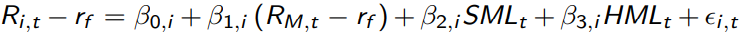

The above formal describes the estimated return using the betas of FF3. It can be seen that the more positive the betas are, the higher the estimated return. Therefore, the more positive exposures of the high risk portfolio are associated with a higher estimated return and the less positive exposures of the low risk portfolio are associated with a lower estimated return.

In [19]:
#4.
avg_beta_Mkt_high_rc = betas_high_risk_pf['Mkt-RF'].sum() / 10
avg_beta_Mkt_low_rc = betas_low_risk_pf['Mkt-RF'].sum() / 10
print('\n\nThe average beta of the Mkt-RF of the high risk portfolio is: ' ,avg_beta_Mkt_high_rc)
print('The average beta of the Mkt-RF of the low risk portfolio is: ' ,avg_beta_Mkt_low_rc)
print()
avg_beta_smb_high_rc = betas_high_risk_pf['SMB'].sum() / 10
avg_beta_smb_low_rc = betas_low_risk_pf['SMB'].sum() / 10
print('The average beta of the SMB of the high risk portfolio is: ' ,avg_beta_smb_high_rc)
print('The average beta of the SMB of the low risk portfolio is: ' ,avg_beta_smb_low_rc)
print()
avg_beta_hml_high_rc = betas_high_risk_pf['HML'].sum() / 10
avg_beta_hml_low_rc = betas_low_risk_pf['HML'].sum() / 10
print('The average beta of the HML of the high risk portfolio is: ' ,avg_beta_hml_high_rc)
print('The average beta of the HML of the low risk portfolio is: ' ,avg_beta_hml_low_rc, '\n\n')

print('The average risk contribution of the high risk portfolio is: ', risk_contribution[high_risk].sum() / 10)
print('The average risk contribution of the low risk portfolio is: ', risk_contribution[low_risk].sum() / 10)




The average beta of the Mkt-RF of the high risk portfolio is:  1.24220253338485
The average beta of the Mkt-RF of the low risk portfolio is:  0.489998839063451

The average beta of the SMB of the high risk portfolio is:  0.13373107154918784
The average beta of the SMB of the low risk portfolio is:  -0.27685583942786157

The average beta of the HML of the high risk portfolio is:  1.1403725189822418
The average beta of the HML of the low risk portfolio is:  0.008893836650251823 


The average risk contribution of the high risk portfolio is:  0.11125788324534587
The average risk contribution of the low risk portfolio is:  0.020636304763811515



**Comparing similarities and differences between the two portfolios:**

Here, too, it is hard to ignore the difference between the two portfolios.

*   The high risk portfolio has a more systematic movement with the market in comparion to the low risk portfolio (Mkt-RF). RF is the risk-free-rate of the portfolio and here it tells us how much profit we make per day.
*   The companies in the high risk portfolio behave on average like smaller companies (SMB), in contrast to the companies in the low risk portfolio, which behave more like larger companies.
*   The companies of the high risk portfolio have a positive HML in average in comparison to the companies of the low risk portfolio. This is very surprising, as the companies of the high risk portfolio behave more like value stocks than the companies of the low risk portfolio. They behave nearly like growth companies. A positive beta means that a portfolio has a positive relationship with the value premium, or the portfolio behaves like one with exposure to value stocks. If the beta is negative, the portfolio behaves more like a growth stock portfolio.

**Comparing this with the risk contribution of the two portfolios:**


*   The average risk contribution of the high risk portfolio is 0.11125788324534587 while the average risk contribution of the low risk portfolio is 0.020636304763811515. This may seem to be just a little difference, but it is not. It's all a matter of scale. It should be noted that the high risk portfolio is on average higher than the low risk portfolio in all FF3 exposures.
*   Moreover, logically, the risk contribution of the high risk portfolio is on average significantly higher than that of the low risk portfolio.





---



Betas of the high risk portfolio


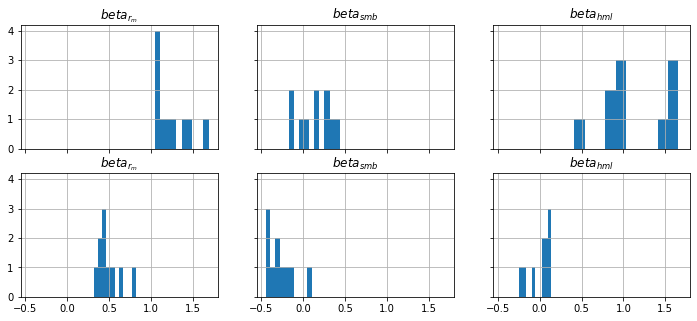

Betas of the low risk portfolio


In [20]:
#4.
import matplotlib.pylab as plt

# examine the distribution for each beta factor over the high risk and low risk portfolio
print('Betas of the high risk portfolio')
fig, axs = plt.subplots(2, 3, figsize = (12, 5), sharex=True, sharey=True)
betas_high_risk_pf.loc[:, 'Mkt-RF'].hist(ax = axs[0,0])
axs[0,0].set_title(r'$beta_{r_m}$')
betas_high_risk_pf.loc[:, 'SMB'].hist(ax = axs[0,1])
axs[0,1].set_title(r'$beta_{smb}$')
betas_high_risk_pf.loc[:, 'HML'].hist(ax = axs[0,2])
axs[0,2].set_title(r'$beta_{hml}$')


betas_low_risk_pf.loc[:, 'Mkt-RF'].hist(ax = axs[1,0])
axs[1,0].set_title(r'$beta_{r_m}$')
betas_low_risk_pf.loc[:, 'SMB'].hist(ax = axs[1,1])
axs[1,1].set_title(r'$beta_{smb}$')
betas_low_risk_pf.loc[:, 'HML'].hist(ax = axs[1,2])
axs[1,2].set_title(r'$beta_{hml}$')
plt.show()
print('Betas of the low risk portfolio')

#for the better comparison I used the sharex and sharey option for the subplots



*   In the two charts above we see the weighting of the betas according to FF3 of the two portfolios. In the case of the high risk portfolio, the MKT-RF is weighted more heavily with positive values. This means that it has a higher correlation to the overall market.
*   The SMB factor of the high risk portfolio has a stronger weighting with positive values than the low risk portfolio. This means that the companies behave more like small companies in the high risk portfolio. 
*   The HML factor of the high risk portfolio has a stronger weighting in the positive values than the low risk portfolio. This means that the portfolio has a positive relationship with the value premium or behave like a portfolio with exposure to value stocks.





---
---

**Further comparison (company fundamentals):**

Now, we are going to have a look on the top/lowest 10 contributors' fundamentals, e.g. the sector



In [21]:
#4.
def sometimes_it_works():
    print('Here are the sectors of the high_risk portfolio companies:\n')
    for stock in high_risk:

      stock_ticker = yf.Ticker(stock)
      print(stock, ": ", stock_ticker.info['sector'])

    print('\n Here are the sectors of the low_risk portfolio companies:\n')
    for stock1 in low_risk:

      stock_ticker = yf.Ticker(stock1)
      print(stock1, ": ", stock_ticker.info['sector'])

In [22]:
#4. 
print('You can comment the the next line of code. Maybe yfinace developers fixed this buck - maybe not:')
sometimes_it_works()

You can comment the the next line of code. Maybe yfinace developers fixed this buck - maybe not:
Here are the sectors of the high_risk portfolio companies:

LNC :  Financial Services
APA :  Energy
OXY :  Energy
HAL :  Energy
KEY :  Financial Services
BA :  Industrials
FITB :  Financial Services
CMA :  Financial Services
MRO :  Energy
SLB :  Energy

 Here are the sectors of the low_risk portfolio companies:

KMB :  Consumer Defensive
COST :  Consumer Defensive
WMT :  Consumer Defensive
K :  Consumer Defensive
NEM :  Basic Materials
CAG :  Consumer Defensive
GIS :  Consumer Defensive
CPB :  Consumer Defensive
KR :  Consumer Defensive
CLX :  Consumer Defensive


Insight into the companies' industries is also very helpful:

While the high_risk portfolio contains more companies from the Financial Services sector, the low_risk portfolio mainly includes companies from the Communication Services and Consumer Defensive sectors. Especially in our timeline (during the Corona crisis), the defensive stocks (from the low_risk portfolio) were not hit as hard as the companies from the financial services sector.


---



---



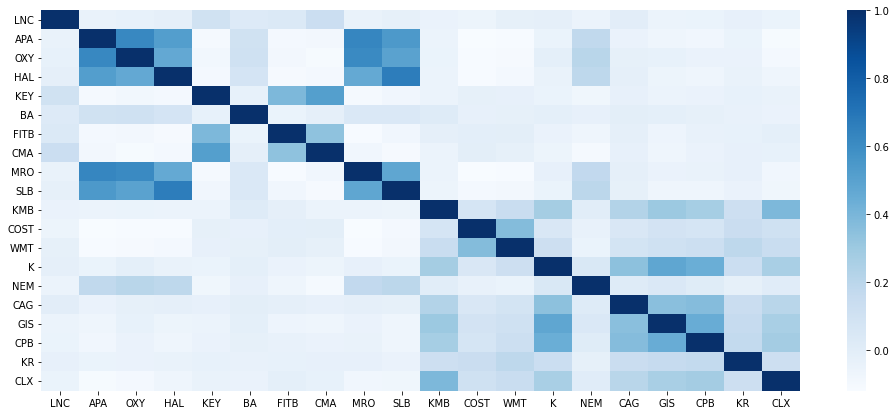

In [23]:
#4.
#Here we can find the correlation heatmap of the residuals of the top 20 companies
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize = (17, 7))
sns.heatmap(data = residuals.corr(), cmap="Blues",ax = ax)

In the figure above we see the correlation between the residuals of the **both portfolios**. The residuals of the 3-factor models of these portfolios are mostly uncorrelated. This means that the 3 factors are sufficient to capture almost all co-movements of the returns of these companies!



---



Here we can see the betas (FF3) in a 3D-Diagramm:


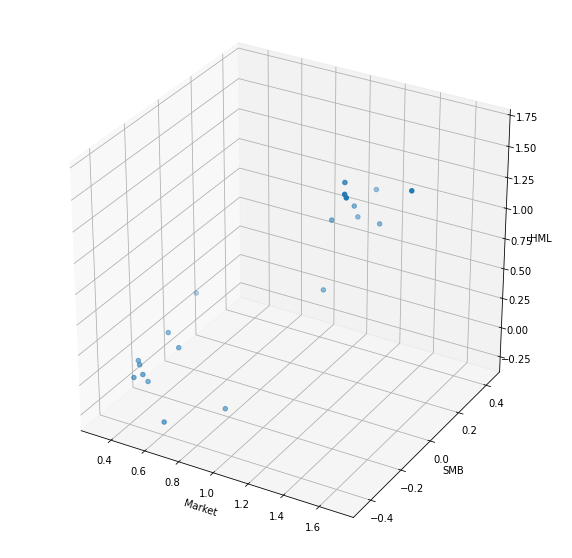

In [24]:
#4.
betas = []
for company in top_20:
    y = df_analysis[company] - df_analysis.RF
    model = sm.OLS(y, X).fit()
    betas.append(model.params[1:].values)
betas = np.array(betas)
betas_df = pd.DataFrame(betas, index = companies)
betas_df.columns = ['mkt', 'smb', 'hml']
betas_df_m = betas_df.mean()
betas_df_s = betas_df.std(ddof = 1)
betas_df_scaled = (betas_df - betas_df_m) / betas_df_s

mkt = betas_df.values[:, 0]
smb = betas_df.values[:, 1]
hml = betas_df.values[:, 2]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(mkt, smb, hml)
ax.set_xlabel('Market')
ax.set_ylabel('SMB')
ax.set_zlabel('HML')
print('Here we can see the betas (FF3) in a 3D-Diagramm:')
plt.show()

In [25]:
#4.
betas_df_scaled

,mkt,smb,hml
LNC,1.938154,0.095446,1.642847
APA,0.546814,1.825907,0.585507
OXY,0.446541,0.918785,0.569293
HAL,0.845169,1.371330,0.422991
KEY,1.278521,-0.261358,1.593092
BA,0.427298,0.763952,-0.245684
FITB,1.361032,-0.371142,1.619136
CMA,0.911918,0.397169,1.365683
MRO,0.595477,1.195165,0.660367
SLB,0.500855,1.457876,0.387761


In the 3D-Plot above we can see the high risk portfolio stocks and the low risk portfolio stocks (20 in total) measured by their exporsures according to FF3.

Text(0.5, 1.0, 'Distortion score elbow for k-means clustering')

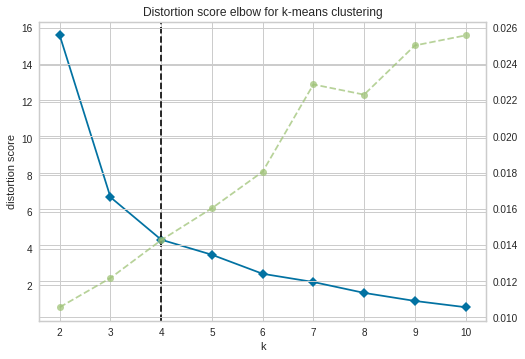

In [26]:
#4.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

fig, ax = plt.subplots()
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(betas_df_scaled.values)
ax.set_xlabel('k')
ax.set_ylabel('distortion score')
ax.set_title('Distortion score elbow for k-means clustering')

In the showcase above we can see the distortion score. The elbow method is a technique used to determine the optimal number of clusters for k-means clustering. The method involves plotting the distortion score (also known as the within-cluster sum of squares) against the number of clusters, and selecting the "elbow" point on the plot as the optimal number of clusters.

The distortion score is a measure of how far each point in a cluster is from the cluster's centroid, and the elbow point is the point at which the decrease in the distortion score begins to level off. In other words, it's the point where adding more clusters doesn't significantly decrease the distortion score anymore.

This technique helps to avoid the problem of overfitting, where an excessive number of clusters are used and the resulting clusters are not meaningful. It is important to keep in mind that the elbow method is not a foolproof technique and the final decision of the number of clusters should be based on the domain knowledge of the data.

**For our data the k value is 4 - but why is that?**

In [27]:
#4.
kmeans_ = KMeans(n_clusters = 4, random_state = 42)
kmeans_.fit(betas_df_scaled.values)

KMeans(n_clusters=4, random_state=42)

In the 3D-Plot below we can see the stocks of the portfolios (20 stocks) measured by their exporsures according to FF3. 
Here we devided the stocks into 4 clusters as calculated earlier: 


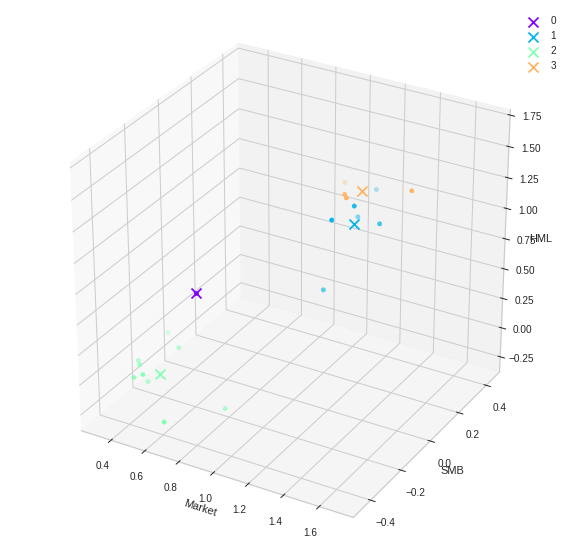

In [28]:
#4.
from matplotlib import cm

kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(betas_df_scaled.values)

rainbow = cm.get_cmap('rainbow')
colors = rainbow([i / len(np.unique(kmeans.labels_)) for i in range(len(np.unique(kmeans.labels_)))])

betas_df.loc[:, 'cluster'] = kmeans.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

for i, cluster in enumerate(np.unique(kmeans.labels_)):
  mkt_tmp = betas_df[betas_df.cluster == cluster].values[:, 0]
  smb_tmp = betas_df[betas_df.cluster == cluster].values[:, 1]
  hml_tmp = betas_df[betas_df.cluster == cluster].values[:, 2]
  ax.scatter(mkt_tmp, smb_tmp, hml_tmp, color = colors[i])
  c_center = kmeans.cluster_centers_[cluster]
  c_center_non_scaled = c_center[:3] * betas_df_s + betas_df_m
  ax.scatter(c_center_non_scaled[0], c_center_non_scaled[1], c_center_non_scaled[2], color = colors[i], marker = 'x', s = 100, label = cluster)


ax.set_xlabel('Market')
ax.set_ylabel('SMB')
ax.set_zlabel('HML')
ax.legend()
print('In the 3D-Plot below we can see the stocks of the portfolios (20 stocks) measured by their exporsures according to FF3. \nHere we devided the stocks into 4 clusters as calculated earlier: ')
plt.show()

According to the elbow-method we should split our data into 4 clusters. In the showcase above we can see, that one stock got an own cluster for itself. But which stock belongs to which cluster and which of the stocks belong to the high/low risk portfolio? To find this out, I have exteded the betas_df_scaled with to more columns as you can see below:

In [29]:
#4.
betas_df_scaled["cluster"] = kmeans_.labels_

In [30]:
#4.
betas_df_scaled["risk"] = 'low'
betas_df_scaled.loc[high_risk,"risk"] = 'high'

In [31]:
#4.
betas_df_scaled.sort_values('cluster').sort_values('risk')

,mkt,smb,hml,cluster,risk
LNC,1.938154,0.095446,1.642847,3,high
SLB,0.500855,1.457876,0.387761,1,high
APA,0.546814,1.825907,0.585507,1,high
OXY,0.446541,0.918785,0.569293,1,high
HAL,0.845169,1.371330,0.422991,1,high
BA,0.427298,0.763952,-0.245684,1,high
MRO,0.595477,1.195165,0.660367,1,high
FITB,1.361032,-0.371142,1.619136,3,high
CMA,0.911918,0.397169,1.365683,3,high
KEY,1.278521,-0.261358,1.593092,3,high


Here we see the scaled exposures (FF3) of the respective stocks, the corresponding cluster calculated beforehand and the affiliation to the respective portfolio (high risk and low risk portfolio). 

Both the high risk companies and the low risk companies were divided into two clusters each.

The outlier, which was assigned to its own cluster, belongs to the low risk company: NEM - 
It is striking here that NEM's SMB value is the only positive one among the low-risk companies and at the same time has the highest MKT-RF value of the low-risk companies.

**For the optimal visualization of the 4 clusters I have used the 3D Scatter from plotly express in the showcase below:**

Here we can hover over the points and see their exposures according to FF3, the corresponding cluster and the ticker of the stock. We can also move in the scatter.

In [32]:
#4.
import plotly.express as px
betas_df_scaled['ticker'] = betas_df_scaled.index

fig = px.scatter_3d(betas_df_scaled, x=betas_df_scaled['mkt'], y=betas_df_scaled['smb'], z=betas_df_scaled['hml'], color='cluster',
                                  hover_data={'mkt':':.2f', 
                                              'smb':':.2f', 
                                              'hml':':.2f', 
                                              'cluster':True,
                                              'ticker':True})
fig.show()


In [33]:
#4.
betas_df_scaled.groupby('cluster').mean()

,mkt,smb,hml
cluster,,,
0,-1.283654,0.634469,-0.675579
1,0.560359,1.255503,0.396706
2,-0.840903,-0.891955,-0.880602
3,1.372406,-0.034971,1.555190


Here we can see the average scaled exposures (FF3) of the vaules of the 4 clusters. Obviously, these values are the same results I calculated earlier by hand of the two portfolios. Comparing this with the dataframe we calculated one step earlier, the average values can be assigned to the respective 2 portfolios. 



---



---



In the next six visualizations, we take a closer look at the performance and behavior of Walmart and the FF3. **Walmart** Inc. is a global U.S. retail company that dominates a large portion of the U.S. market. Walmart is ranked in the Fortune Global 500 list as the top-selling company in the world. This makes the company a rather defensive stock (value stock), which is also one of the 10 lowest-risk contribution stocks I calculated earlier.

In [34]:
#4.
df_close_red = df_close
df_close_red.set_index(pd.to_datetime(df_close.index), drop = True, inplace = True)
df_close_red = df_close_red.loc["1998-01-02":"2022-06-30"]
three_factors_red = three_factors.loc["1998-01-02":"2022-06-30"]

In [35]:
starts_MKT_RF = []
ends_MKT_RF = []
starts_SMB = []
ends_SMB = []
starts_HML = []
ends_HML = []

for row in three_factors_red.iterrows():
    t_stamp, value = row
    if value.values[0] > 0.00:
        starts_MKT_RF.append(t_stamp)
    elif value.values[0] < 0.00:
        ends_MKT_RF.append(t_stamp)
    else:
        continue

for row in three_factors_red.iterrows():
    t_stamp, value = row
    if value.values[1] > 0.00:
        starts_SMB.append(t_stamp)
    elif value.values[1] < 0.00:
        ends_SMB.append(t_stamp)
    else:
        continue

for row in three_factors_red.iterrows():
    t_stamp, value = row
    if value.values[2] > 0.00:
        starts_HML.append(t_stamp)
    elif value.values[2] < 0.00:
        ends_HML.append(t_stamp)
    else:
        continue



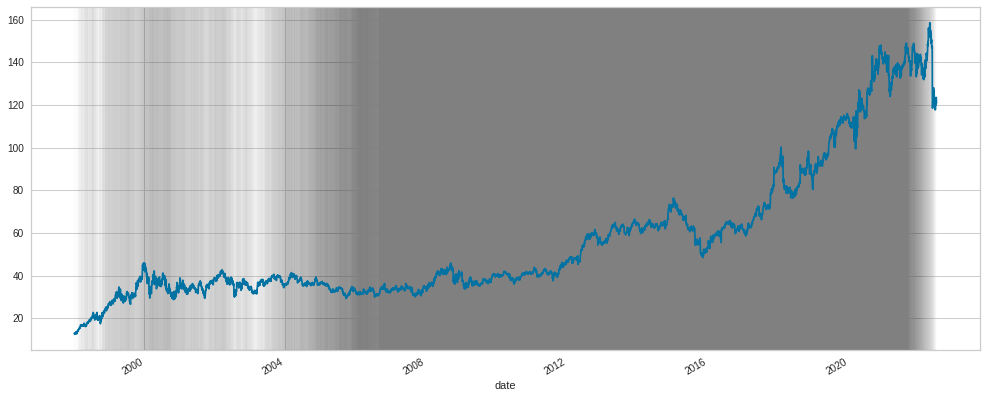

In [36]:
#4.
# Here is the share price development of Walmart and the MKT RF beta
fig, axs = plt.subplots(figsize = (17, 7))
df_close_red.WMT.plot(ax = axs)

for start, end in zip(starts_MKT_RF, ends_MKT_RF):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

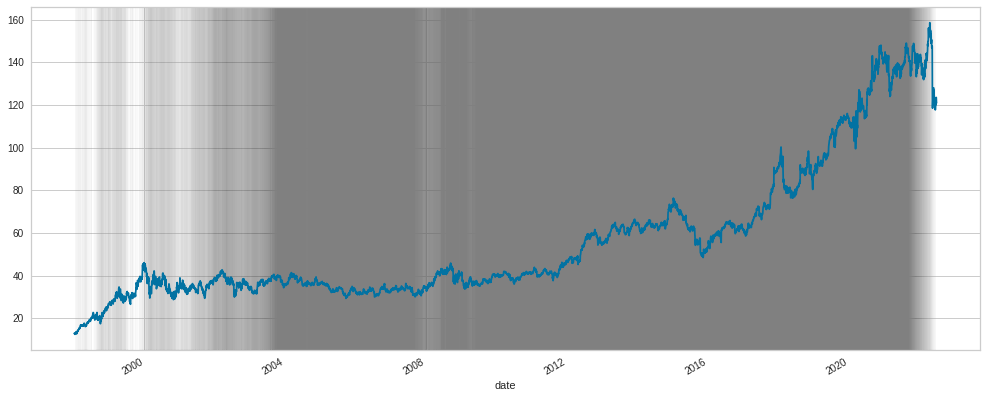

In [37]:
#4.
# Here is the share price development of Walmart and the SMB beta
fig, axs = plt.subplots(figsize = (17, 7))
df_close_red.WMT.plot(ax = axs)

for start, end in zip(starts_SMB, ends_SMB):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

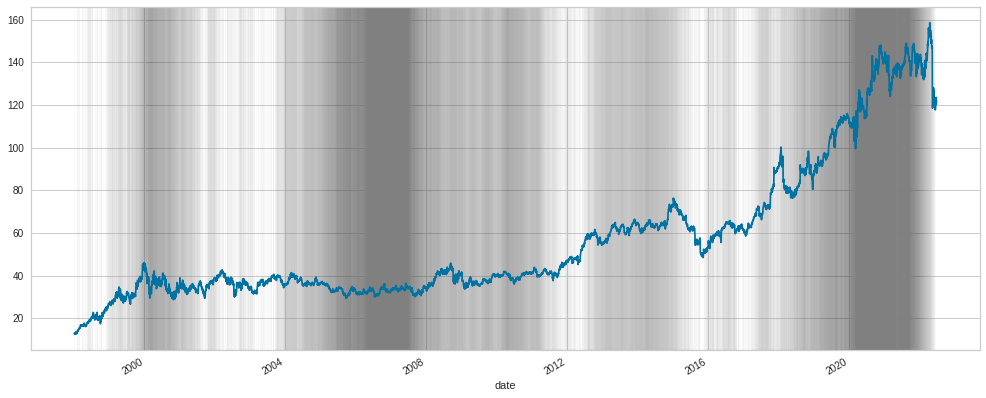

In [38]:
#4.
# Here is the share price development of Walmart and the HML beta
fig, axs = plt.subplots(figsize = (17, 7))
df_close_red.WMT.plot(ax = axs)

for start, end in zip(starts_HML, ends_HML):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

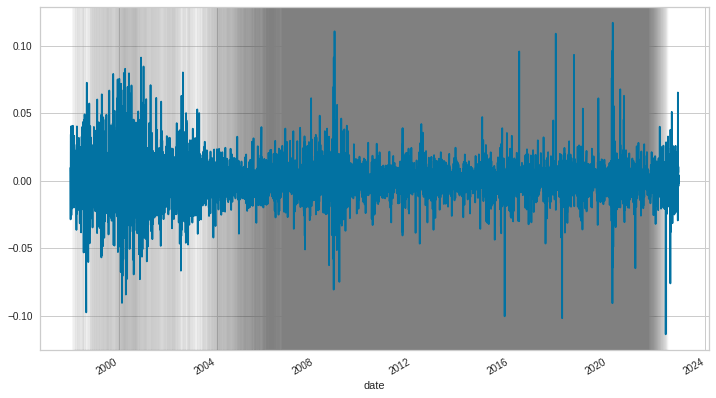

In [39]:
#4.
# Here are the discrete returns of Walmart and the MKT RF beta
fig, axs = plt.subplots(figsize = (12, 7))
disc_returns_df.WMT.plot(ax = axs)

for start, end in zip(starts_MKT_RF, ends_MKT_RF):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

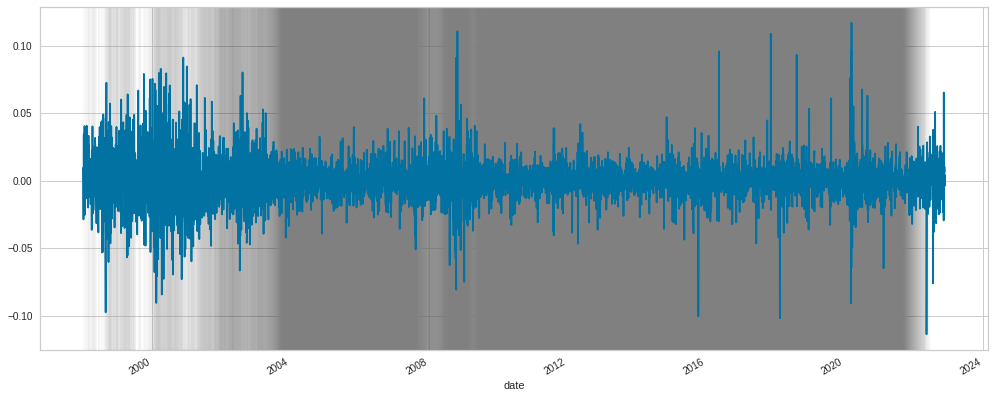

In [40]:
#4.
# Here are the discrete returns of Walmart and the SMB beta
fig, axs = plt.subplots(figsize = (17, 7))
disc_returns_df.WMT.plot(ax = axs)

for start, end in zip(starts_SMB, ends_SMB):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

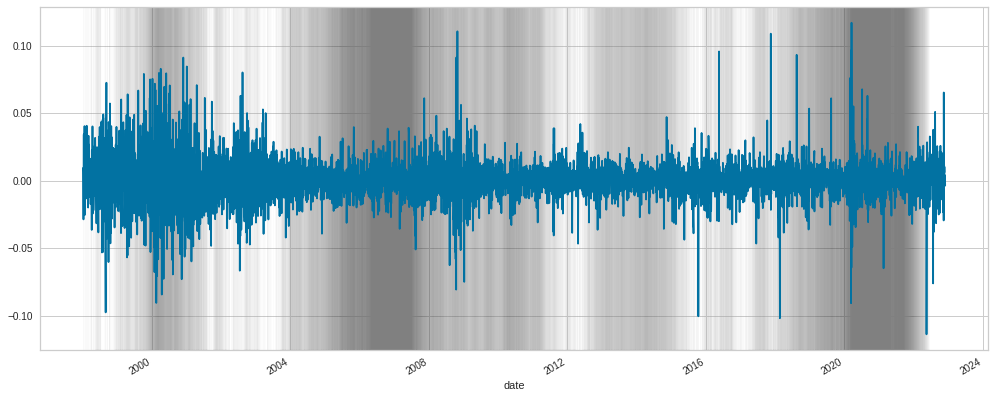

In [41]:
#4.
# Here are the discrete returns of Walmart and the HML beta
fig, axs = plt.subplots(figsize = (17, 7))
disc_returns_df.WMT.plot(ax = axs)

for start, end in zip(starts_HML, ends_HML):
    axs.axvspan(start, end, color = 'grey', alpha = 0.01)

Walmart with a MKT-RF beta of 0.655175, a SMB beta of -0.447524 and a HML beta of -0.190705 according to the FF3 means, that it moves systematic with the market, behaves like a big company and has a low market to book ratio (growth stock). 
The gray shading in the background means that the beta according to FF3 was positive or negative. It is fascinating that in periods in which the factor was positive for a long time, for example, the price of Walmart also increased.



---



---



**The END**
